# Scikit-learn y Machine Learning

Inspirado por el curso de Xavier Dupré

Integrantes: **AGREGUEN SUS NOMBRES COMPLETOS**

## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


#### **Se recomienda fuertemente que no usen ChatGPT para resolver la actividad, ya que la experiencia de aprendizaje es mucho mayor si lo hacen por su cuenta.**

In [1]:
%matplotlib inline

## Datos Sintéticos

Simulamos un dataset de datos aleatorios con una distribución uniforme $\mathcal{U}_{(0,1)}$.

In [2]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.62374055, 0.72869252],
       [0.21101065, 0.46819362],
       [0.68075647, 0.33446251],
       [0.54857574, 0.23659288],
       [0.58043505, 0.19014967]])

Creemos un modelo inicial: $Y = 3 X_1 - 2 X_2^2 + \epsilon$.

Necesitamos aproximar $Y$ usando descriptores $X_1$ y $X_2$.

$\epsilon $~$ \mathcal{U}_{(0,1)}$ es una fuente de ruido que no podemos controlar.

In [3]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([1.80855561, 0.62473361, 2.52635957, 2.52138356, 2.25345427])

## Ejercicio 1: Dividiendo en datos de entrenamiento y testeo

Debemos testear nuestro modelo con datos distintos a los usados para entrenarlo **para poder medir su capacidad de generalización**. Como hemos visto, el riesgo empírico en un conjunto de datos dado no es representativo del riesgo general, y podemos observar un fenómeno de sobreaprendizaje (overfitting) en el conjunto de entrenamiento.

En nuestro caso, queremos que el modelo aprenda la ley $3 X_1 - 2 X_2^2$ y **el sobreaprendizaje equivaldría a memorizar el vector de ruido $\epsilon$** que solo corresponde a variaciones en $Y$ independientes de nuestro modelo.

Simple [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [4]:
# to fill
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.7, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0)


## Ejercicio 2: Entrenar una regresión lineal

Encuentre los parámetros $\theta = \begin{pmatrix}
           \theta_{1} \\
           \theta_{2}
         \end{pmatrix}$ solución de $\underset{\theta}{\arg\max} \sum_{i=1}^{n}|Y_i-f_{\theta}(\mathbf{X}_i)|^2$
         
Donde $f_{\theta}(\mathbf{X}) = \theta_0 + \sum_{d=1}^{D}\theta_d X_d$ en el caso $D=2$

Calcule el coeficiente $R^2$.
$$R^2=1-\frac{\sum_{i=1}^{n}|Y_i-f(\mathbf{X}_i)|^2}{\sum_{i=1}^{n}|Y_i-\overline{Y}|^2}$$

Donde $\mathbf{X} = \begin{pmatrix}
           X_{1} \\
           X_{2}
         \end{pmatrix}$ et $\overline{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_i$

Use : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [16]:
# to fill
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train, y_train)
theta1 = reg.coef_[0]
theta2 = reg.coef_[1]
print(f"thetha1: {theta1}, theta2: {theta2}")

y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"r2_score = {r2}")


thetha1: 3.0137656881703387, theta2: -2.0354306658209924
r2_score = 0.9149731104560515


## Ejercicio 3: Mejorando el modelo aplicando una transformación apropiada

El modelo inicial es: $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Simplemente agregue carecterísticas polinómicas con [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Tomando el parámetro :
```python
degree=2
```
El descriptor original $\mathbf{X} = \begin{pmatrix} X_{1} \\ X_{2} \end{pmatrix}$
Ahora será $\mathbf{X} = \begin{pmatrix} 1 \\ X_{1} \\ X_{2} \\ X_{1}^2 \\ X_{1}X_{2} \\ X_{2}^2 \end{pmatrix}$ lo que nos da:

$$f_{\theta}(\mathbf{X}) = \theta'_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_1^2 + \theta_4 X_1X_2 + \theta_5 X_2^2$$

In [15]:
# to fill
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

reg2 = LinearRegression().fit(X_train_poly, y_train)
theta0 = reg2.coef_[0]
theta11 = reg2.coef_[1]
theta22 = reg2.coef_[2]
theta3 = reg2.coef_[3]
theta4 = reg2.coef_[4]
theta5 = reg2.coef_[5]
print(f"thetha0: {theta0}, theta1: {theta11}, theta2: {theta22}, theta3: {theta3}, theta4: {theta4}, theta5: {theta5}")

y_pred_poly = reg2.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"r2_score = {r2_poly}")


thetha0: 0.0, theta1: 2.8251472136938673, theta2: -0.21584527184894373, theta3: 0.2362980794981793, theta4: -0.08080606799207518, theta5: -1.726379341444719
r2_score = 0.931494246716459


## Ejercicio 4: entrenar un Random Forest

Use: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [26]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
# learning classifier
clf.fit(X_train, y_train)
# scoring classifier
clf.score(X_test, y_test)

0.98725604932309

Veamos ahora las características polinómicas...

In [29]:
# to fill
from sklearn.ensemble import RandomForestRegressor

clf.fit(X_train_poly, y_train)

clf.score(X_test_poly, y_test)


0.914863767561674

## Ejercicio 5: Un poco de matemáticas

Compare ambos modelos con los siguientes datos. De qué se puede percatar? Por qué?

In [9]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

In [23]:
# to fill
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X_poly2 = poly.fit_transform(X_test2)
lin = LinearRegression().fit(X_poly2, y_test2)
y_pred_poly2 = lin.predict(X_poly2)
r2_poly2 = r2_score(y_test2, y_pred_poly2)
print(f"r2_score_poly: {r2_poly2}")

clf.fit(X_test2, y_test2)
y_pred_clf = clf.predict(X_test2)
r2_clf = r2_score(y_test2, y_pred_clf)
print(f"r2_score_clf: {r2_clf}")
        

r2_score_poly: 0.961911515750095
r2_score_clf: 0.9931483116282305


## Ejercicio 6: Ilustrando el overfitting con un árbol de decisión

A medida que la complejidad del modelo aumenta, el overfitting ocurre. Análogamente, el modelo usando solo $X_1$ y $X_2$ no está necesariamente adaptado al problema y cae en un caso underfitting. Grafique cómo evoluciona la R2 según la profundidad del decision tree.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas

res = []
for md in range(1, 20):
    # to fill
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    r2_train = tree.score(X_train, y_train)
    r2_test = tree.score(X_test, y_test)
    res.append(dict(profondeur=md, r2_train=r2_train, r2_test=r2_test))

df = pandas.DataFrame(res)
df.head(10)

,profondeur,r2_train,r2_test
0,1,1.0,0.860637
1,2,1.0,0.858861
2,3,1.0,0.863147
3,4,1.0,0.855712
4,5,1.0,0.855083
5,6,1.0,0.853158
6,7,1.0,0.855782
7,8,1.0,0.853323
8,9,1.0,0.856842
9,10,1.0,0.861150


Text(0.5, 1.0, 'Evolution du R2 selon la profondeur')

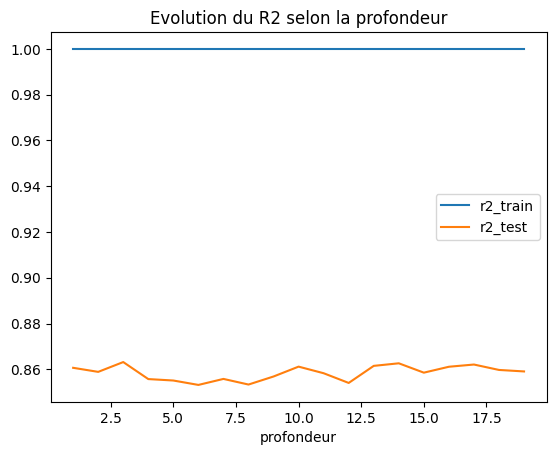

In [18]:
ax = df.plot(x='profondeur', y=['r2_train', 'r2_test'])
ax.set_title("Evolution du R2 selon la profondeur")
